<a href="https://colab.research.google.com/github/Roshan45191958/Test/blob/main/NLP_TWEETS_ASSIGNMENT_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the Libraries

In [3]:
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import WordCloud, STOPWORDS
import warnings # Hide warnings
warnings.filterwarnings('ignore')

### Loading the Data Set

In [4]:
df = pd.read_excel('covid19_tweets.xlsx', index_col=0).reset_index()
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,á‰áŽ¥â˜»Õ¬ê‚…Ï®,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile ðŸ‡ºðŸ‡¸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,ðŸ–Šï¸Official Twitter handle of Department o...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


###Descriptive Analysis

In [5]:
df.shape 

(179108, 13)

In [6]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [7]:
df.describe()

,user_followers,user_friends,user_favourites
count,1.791080e+05,179108.000000,1.791080e+05
mean,1.090555e+05,2121.701566,1.444411e+04
std,8.414670e+05,9162.553072,4.452270e+04
min,0.000000e+00,0.000000,0.000000e+00
25%,1.720000e+02,148.000000,2.060000e+02
50%,9.920000e+02,542.000000,1.791000e+03
75%,5.284000e+03,1725.250000,9.388000e+03
max,4.944256e+07,497363.000000,2.047197e+06


In [8]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))
missing_data(df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,5,36771,10306,0,0,0,0,0,0,0,51334,77,0
Percent,0.00279161,20.5301,5.75407,0,0,0,0,0,0,0,28.6609,0.0429908,0
Types,object,object,object,datetime64[ns],int64,int64,int64,bool,datetime64[ns],object,object,object,bool


In [9]:
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))
unique_values(df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,179103,142337,168802,179108,179108,179108,179108,179108,179108,179108,127774,179031,179108
Uniques,92271,26919,89188,93708,27694,11022,35259,2,136611,178683,52640,610,1


In [10]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

most_frequent_values(df)

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
Total,179103,142337,168802,179108,179108,179108,179108,179108,179108,179108,127774,179031,179108
Most frequent item,GlobalPandemic.NET,India,Breaking News & Critical Information to SURVIV...,2010-07-13 21:58:05,0,0,0,False,2020-07-29 16:30:00,"The incompetence of this administration, and t...",['COVID19'],Twitter Web App,False
Frequence,679,3741,679,679,1662,2839,5268,156013,26,13,37792,56891,179108
Percent from total,0.379,2.628,0.402,0.379,0.928,1.585,2.941,87.106,0.015,0.007,29.577,31.777,100


In [11]:
country_df = pd.read_csv("wikipedia-iso-country-codes.csv")
country_df.columns = ["country", "alpha2", "alpha3", "numeric", "iso"]
country_df.head()


,country,alpha2,alpha3,numeric,iso
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE
3,Western Sahara,EH,ESH,732,ISO 3166-2:EH
4,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF


In [12]:
df.shape


(179108, 13)

In [13]:
df['country'] = df['user_location']
df = df.merge(country_df, on="country")
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,country,alpha2,alpha3,numeric,iso
0,Ms Paz,United States,NaN,2019-09-15 18:10:09,127,974,30217,False,2020-07-25 12:26:21,#FEMA acknowledges #PuertoRico lacks rebuilt h...,"['FEMA', 'PuertoRico', 'COVID19']",Twitter for iPhone,False,United States,US,USA,840,ISO 3166-2:US
1,Resist2020,United States,#blacklivesmatter #notmypresident #lovetrumpsh...,2010-07-18 20:57:33,89,245,12529,False,2020-07-25 12:22:55,How about everyone can spread #COVID19. Anothe...,['COVID19'],Twitter for iPhone,False,United States,US,USA,840,ISO 3166-2:US
2,RebeccaCorn,United States,BINARY OPTIONS EXPERTðŸ…\nFINANCIAL EXPERT AN...,2020-04-10 10:57:37,35,58,28,False,2020-07-25 12:22:20,Due to the epidemic I'm giving $80 - $1000 to ...,NaN,Twitter for Android,False,United States,US,USA,840,ISO 3166-2:US
3,OrianaBeaudet DNP RN,United States,VP of Nursing Innovation @ANANursingWorldÂ» St...,2016-08-15 03:21:55,514,2277,1772,False,2020-07-25 12:20:24,National and state impact of #COVID19 on our e...,['COVID19'],Twitter for iPhone,False,United States,US,USA,840,ISO 3166-2:US
4,Terry ðŸ˜·,United States,*BUILD BACK BETTER*,2009-03-21 16:18:08,110,449,2533,False,2020-07-25 12:19:30,Three Cs is a term I hadnâ€™t heard before. Go...,"['GoodAdvice', 'COVID19']",Twitter Web App,False,United States,US,USA,840,ISO 3166-2:US


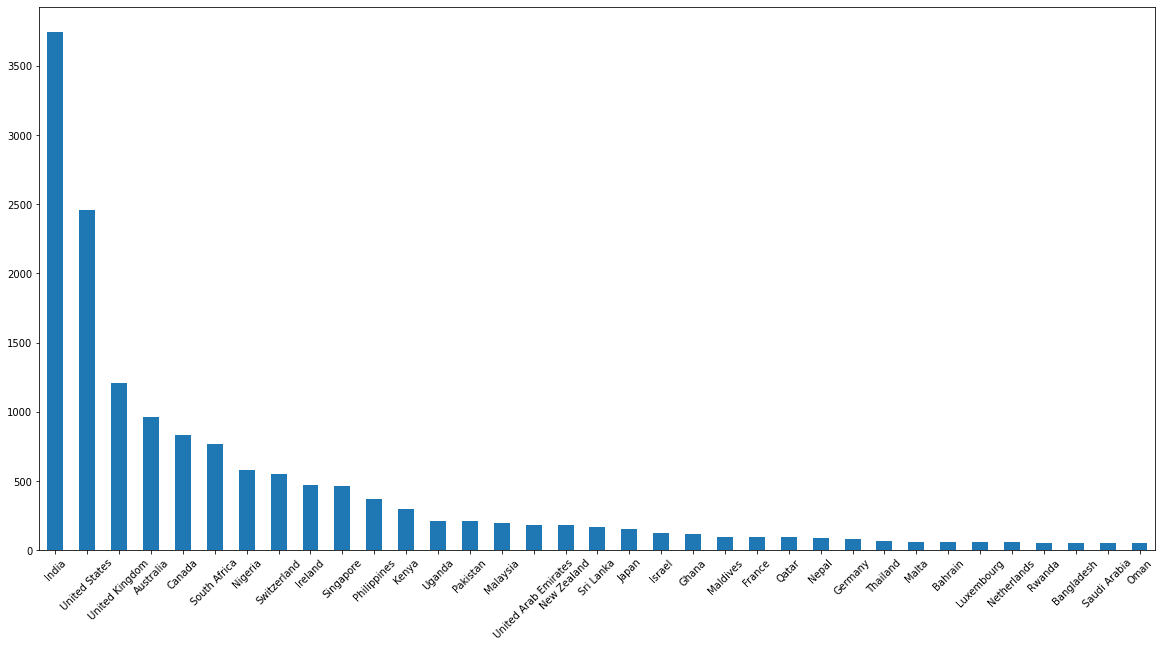

In [14]:
# Plot the top value_counts
plt.figure(figsize=(20,10))
df['user_location'].value_counts().nlargest(35).plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [15]:
import plotly.express as px

def plot_map(dd_df, title):
    hover_text = []
    for index, row in dd_df.iterrows():
        hover_text.append((f"country: {row['country']}<br>tweets: {row['tweets']}\
                          <br>country code: {row['iso']}<br>country alpha3: {row['alpha3']}"))
    dd_df['hover_text'] = hover_text

    fig = px.choropleth(dd_df, 
                        locations="alpha3",
                        hover_name='hover_text',
                        color="tweets",
                        projection="natural earth",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        width=900, height=700)
    fig.update_geos(   
        showcoastlines=True, coastlinecolor="DarkBlue",
        showland=True, landcolor="LightGrey",
        showocean=True, oceancolor="LightBlue",
        showlakes=True, lakecolor="Blue",
        showrivers=True, rivercolor="Blue",
        showcountries=True, countrycolor="DarkBlue"
    )
    fig.update_layout(title = title, geo_scope="world")
    fig.show()   

In [16]:
df['text'].iloc[5]

'Great to be with @ABC7Robert yesterday on @ABC7GMW #SocialDistancing #BBQ #COVID19 #COVID19 https://t.co/XSi0CvTSga'

### Remove Noise


In [17]:
!pip install neattext

#Load Text Cleaning Package
import neattext.functions as nfx


     |████████████████████████████████| 114 kB 29.4 MB/s 


In [18]:
df['text'].apply(nfx.extract_hashtags)

0        [#FEMA, #PuertoRico, #COVID19]
1                           [#COVID19.]
2                                    []
3                            [#COVID19]
4               [#GoodAdvice, #COVID19]
                      ...              
16740              [#DrinkBleachDonnie]
16741         [#COVID19, #covidPuppies]
16742                        [#COVID19]
16743                        [#COVID19]
16744                                []
Name: text, Length: 16745, dtype: object

In [19]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

df[['extracted_hashtags','hashtags']]

,extracted_hashtags,hashtags
0,"[#FEMA, #PuertoRico, #COVID19]","['FEMA', 'PuertoRico', 'COVID19']"
1,[#COVID19.],['COVID19']
2,[],NaN
3,[#COVID19],['COVID19']
4,"[#GoodAdvice, #COVID19]","['GoodAdvice', 'COVID19']"
...,...,...
16740,[#DrinkBleachDonnie],['DrinkBleachDonnie']
16741,"[#COVID19, #covidPuppies]","['COVID19', 'covidPuppies']"
16742,[#COVID19],['COVID19']
16743,[#COVID19],['COVID19']


In [20]:
# Cleaning Text
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)
df[['text','clean_tweet']]

,text,clean_tweet
0,#FEMA acknowledges #PuertoRico lacks rebuilt h...,acknowledges lacks rebuilt homes and a hos...
1,How about everyone can spread #COVID19. Anothe...,How about everyone can spread Another study ...
2,Due to the epidemic I'm giving $80 - $1000 to ...,Due to the epidemic I'm giving $80 - $1000 to ...
3,National and state impact of #COVID19 on our e...,National and state impact of on our elder po...
4,Three Cs is a term I hadnâ€™t heard before. Go...,Three Cs is a term I hadnâ€™t heard before. Go...
...,...,...
16740,@AC360 #DrinkBleachDonnie is bullying our kids...,@AC360 is bullying our kids to go to school ...
16741,My super helper in the kitchen ðŸ‘©â€ðŸ³ðŸ¶...,My super helper in the kitchen ðŸ‘©â€ðŸ³ðŸ¶...
16742,Ouch.. American Journal of Epidemiology.. 29/0...,Ouch.. American Journal of Epidemiology.. 29/0...
16743,@ProjectLincoln #COVID19 stimilus check,@ProjectLincoln stimilus check


In [21]:
# remove userhandles
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))
df[['text','clean_tweet']]

,text,clean_tweet
0,#FEMA acknowledges #PuertoRico lacks rebuilt h...,acknowledges lacks rebuilt homes and a hos...
1,How about everyone can spread #COVID19. Anothe...,How about everyone can spread Another study ...
2,Due to the epidemic I'm giving $80 - $1000 to ...,Due to the epidemic I'm giving $80 - $1000 to ...
3,National and state impact of #COVID19 on our e...,National and state impact of on our elder po...
4,Three Cs is a term I hadnâ€™t heard before. Go...,Three Cs is a term I hadnâ€™t heard before. Go...
...,...,...
16740,@AC360 #DrinkBleachDonnie is bullying our kids...,is bullying our kids to go to school in-pe...
16741,My super helper in the kitchen ðŸ‘©â€ðŸ³ðŸ¶...,My super helper in the kitchen ðŸ‘©â€ðŸ³ðŸ¶...
16742,Ouch.. American Journal of Epidemiology.. 29/0...,Ouch.. American Journal of Epidemiology.. 29/0...
16743,@ProjectLincoln #COVID19 stimilus check,stimilus check


In [22]:
df['clean_tweet'].iloc[20]

'Updated   preprint: Impact of Hypertension on Progression and Prognosis in Patients with COVID-19: A Retrospâ€¦ https://t.co/NijLI5EqGz'

In [23]:
# Remove urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)
# Multiple WhiteSpaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)
# Punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

df[['text','clean_tweet']]

,text,clean_tweet
0,#FEMA acknowledges #PuertoRico lacks rebuilt h...,acknowledges lacks rebuilt homes and a hospit...
1,How about everyone can spread #COVID19. Anothe...,How about everyone can spread Another study no...
2,Due to the epidemic I'm giving $80 - $1000 to ...,Due to the epidemic Im giving $80 $1000 to an...
3,National and state impact of #COVID19 on our e...,National and state impact of on our elder popu...
4,Three Cs is a term I hadnâ€™t heard before. Go...,Three Cs is a term I hadnâ€™t heard before Goo...
...,...,...
16740,@AC360 #DrinkBleachDonnie is bullying our kids...,is bullying our kids to go to school inperson...
16741,My super helper in the kitchen ðŸ‘©â€ðŸ³ðŸ¶...,My super helper in the kitchen ðŸ‘©â€ðŸ³ðŸ¶
16742,Ouch.. American Journal of Epidemiology.. 29/0...,Ouch American Journal of Epidemiology 29/08/2020
16743,@ProjectLincoln #COVID19 stimilus check,stimilus check


### Detect Language

In [24]:
!pip install langdetect

     |████████████████████████████████| 981 kB 27.0 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=81fa74e377babb7f4da946d2567dfcdf0ec2abfcac2c1e16d716bcadeefcc1d1
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [25]:
from langdetect import detect
text = ("adnâ€™t ")
print(detect(text))

cy


In [26]:
l=[]
for i in df['clean_tweet']:
  text = i
  try:
    #print(detect(text))
    l.append(detect(text))
    
  except:
    l.append("non")

In [27]:
df1 = pd.DataFrame (l, columns = ['lng'])
df['lnguage']=df1['lng']
df['lnguage'].value_counts()


en     16208
non       74
de        48
fr        46
af        39
ca        38
cy        33
nl        23
ro        22
it        22
vi        20
tl        19
da        19
so        17
et        16
cs        15
es        13
id        13
lt        10
no         9
pt         9
fi         8
sw         6
pl         5
tr         4
sv         4
sl         3
hr         1
lv         1
Name: lnguage, dtype: int64

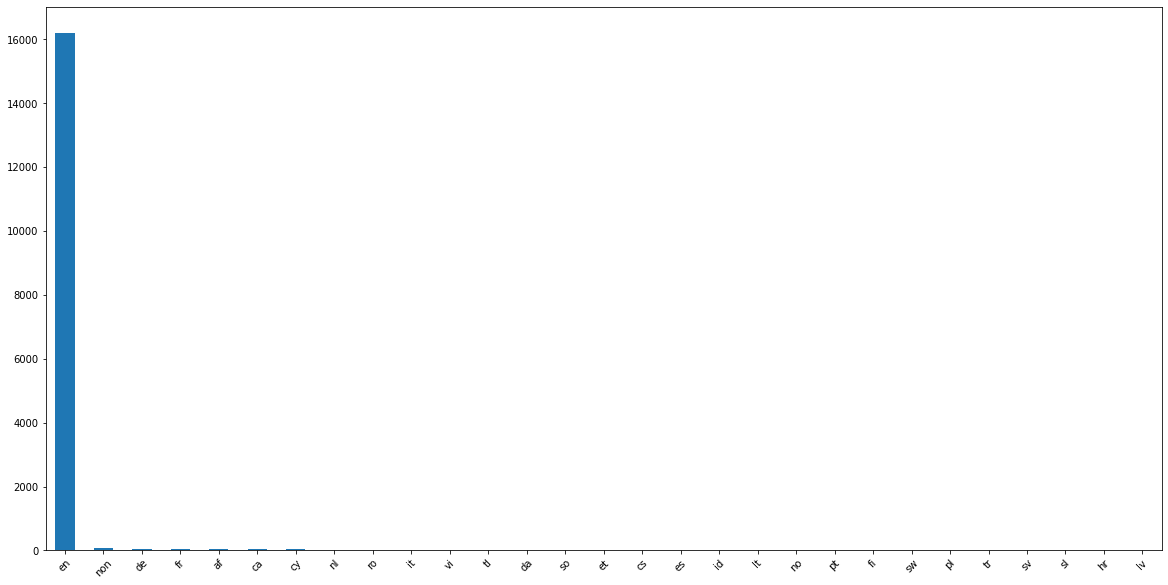

In [28]:
# Plot the top value_counts
plt.figure(figsize=(20,10))
df['lnguage'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [29]:
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'country', 'alpha2',
       'alpha3', 'numeric', 'iso', 'extracted_hashtags', 'clean_tweet',
       'lnguage'],
      dtype='object')

###Sentiment Analysis

In [30]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [31]:
# For the text
ex1 = df['clean_tweet'].iloc[0]
get_sentiment(ex1)

{'polarity': 0.0, 'sentiment': 'Neutral', 'subjectivity': 0.0}

In [32]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)
df['sentiment_results']

0        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
1        {'polarity': -0.20000000000000004, 'subjectivi...
2        {'polarity': 0.05833333333333333, 'subjectivit...
3        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4        {'polarity': 0.7, 'subjectivity': 0.6000000000...
                               ...                        
16740    {'polarity': 0.2, 'subjectivity': 0.1, 'sentim...
16741    {'polarity': 0.3333333333333333, 'subjectivity...
16742    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
16743    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
16744    {'polarity': 0.5, 'subjectivity': 0.9333333333...
Name: sentiment_results, Length: 16745, dtype: object

In [33]:
pd.json_normalize(df['sentiment_results'].iloc[10])

,polarity,subjectivity,sentiment
0,-0.118519,0.196296,Negative


In [34]:
df[['polarity','subjectivity','sentiment']]=(pd.json_normalize(df['sentiment_results']))

In [35]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,country,alpha2,alpha3,numeric,iso,extracted_hashtags,clean_tweet,lnguage,sentiment_results,polarity,subjectivity,sentiment
0,Ms Paz,United States,NaN,2019-09-15 18:10:09,127,974,30217,False,2020-07-25 12:26:21,#FEMA acknowledges #PuertoRico lacks rebuilt h...,"['FEMA', 'PuertoRico', 'COVID19']",Twitter for iPhone,False,United States,US,USA,840,ISO 3166-2:US,"[#FEMA, #PuertoRico, #COVID19]",acknowledges lacks rebuilt homes and a hospit...,en,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
1,Resist2020,United States,#blacklivesmatter #notmypresident #lovetrumpsh...,2010-07-18 20:57:33,89,245,12529,False,2020-07-25 12:22:55,How about everyone can spread #COVID19. Anothe...,['COVID19'],Twitter for iPhone,False,United States,US,USA,840,ISO 3166-2:US,[#COVID19.],How about everyone can spread Another study no...,en,"{'polarity': -0.20000000000000004, 'subjectivi...",-0.200000,0.633333,Negative
2,RebeccaCorn,United States,BINARY OPTIONS EXPERTðŸ…\nFINANCIAL EXPERT AN...,2020-04-10 10:57:37,35,58,28,False,2020-07-25 12:22:20,Due to the epidemic I'm giving $80 - $1000 to ...,NaN,Twitter for Android,False,United States,US,USA,840,ISO 3166-2:US,[],Due to the epidemic Im giving $80 $1000 to an...,en,"{'polarity': 0.05833333333333333, 'subjectivit...",0.058333,0.466667,Positive
3,OrianaBeaudet DNP RN,United States,VP of Nursing Innovation @ANANursingWorldÂ» St...,2016-08-15 03:21:55,514,2277,1772,False,2020-07-25 12:20:24,National and state impact of #COVID19 on our e...,['COVID19'],Twitter for iPhone,False,United States,US,USA,840,ISO 3166-2:US,[#COVID19],National and state impact of on our elder popu...,en,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,Neutral
4,Terry ðŸ˜·,United States,*BUILD BACK BETTER*,2009-03-21 16:18:08,110,449,2533,False,2020-07-25 12:19:30,Three Cs is a term I hadnâ€™t heard before. Go...,"['GoodAdvice', 'COVID19']",Twitter Web App,False,United States,US,USA,840,ISO 3166-2:US,"[#GoodAdvice, #COVID19]",Three Cs is a term I hadnâ€™t heard before Goo...,en,"{'polarity': 0.7, 'subjectivity': 0.6000000000...",0.700000,0.600000,Positive


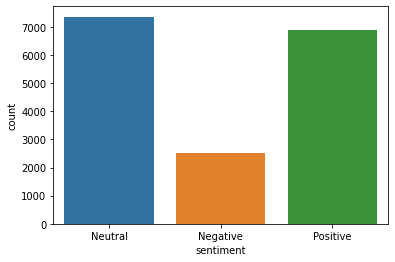

In [36]:
# Plot with seaborn
sns.countplot(df['sentiment'])

In [37]:
df['sentiment'].value_counts()

Neutral     7359
Positive    6886
Negative    2500
Name: sentiment, dtype: int64

### Keyword Extraction


In [38]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [39]:
positive_tweet

2        Due to the epidemic Im giving $80  $1000 to an...
4        Three Cs is a term I hadnâ€™t heard before Goo...
5                           Great to be with yesterday on 
9         may hit area with major spread amp full hospi...
13       New preprint: Country distancing reveals the e...
                               ...                        
16737     One question why you let us ay home for more ...
16738    From today onward we are living beyond the ear...
16740     is bullying our kids to go to school inperson...
16741     My super helper in the kitchen ðŸ‘©â€ðŸ³ðŸ¶  
16744    The latest from The Guardian glad to be report...
Name: clean_tweet, Length: 6886, dtype: object

### Remove Stop words and Tokenization

In [40]:
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

positive_tweet_list

['epidemic Im giving $80 $1000 person looking able round iâ€¦',
 'Cs term hadnâ€™t heard Good advice',
 'Great yesterday',
 'hit area major spread amp hospitals need',
 'New preprint: Country distancing reveals effectiveness travel restrictions COVID19',
 'New preprint: Anxiety perceived risk COVID19 outbreak',
 'New preprint: analysis mortality Ontario cremation data: Rise cremations COVIâ€¦',
 'New preprint: Epidemiological cohort study finds association COVID19 GuillainBarre syâ€¦',
 'ur normal hardworking patriotic taxpaying Republican u r required abide law ur insanâ€¦',
 'New preprint: Infectivity susceptibility risk factors associated SARSCoV2 transmission underâ€¦',
 'New preprint: Mathematical modelling dynamics containment COVID19 Ukraine',
 'New preprint: SARSCoV2 serosurvey Health Care Workers Veneto Region',
 'New preprint: Sentiment Informed Timeseries Analyzing AI (SITALA) curb spread COVID19 Houston',
 'New preprint: Concerns quality life access care productivity genera

In [41]:
for line in positive_tweet_list:
    for token in line.split():
        print(token)

Streaming output truncated to the last 5000 lines.
defense
spread
novel
coâ€¦
nice
day
famâ€¦
COVID19:
Nigerias
Confirmed
Cases
Rises
47290
423
New
Cases
Recorded
WANT
START
EARNING
3000
DAILY
PHONE
KINDLY
SEND
WHATSAPP
CHAT
+254706151267
STARTINâ€¦
Prudential
Bank
supports
COVID19
National
Trust
Fund
GHÂ¢200000
|
here:
Update:
Wash
hands
soap
running
water
20sec
Talks
Russia
New
Vaccine
Barca
player
tested
positive
COVID19
revealed
final
day
weâ€™re
highlighting
John
Addoâ€™s
story
John
developed
foot
peddle
handwashâ€¦
Update:
Case
Ghana
11th
August
122
new
cases
surge
case
count
Ghana
41â€¦
Update:
Avoid
touching
face
mouth
ears
nose
hand
sanitized
14
million
people
recovered
COVID19
worldwide
Lets
continue
stay
safe
visitâ€¦
Real
Text:
Prez
AkufoAddos
15th
update
measures
taken
COVID19
COVID19:
Nigeria
Records
298
New
Cases
Confirmed
Cases
Nears
50000
Update:
Avoid
contact
live
animals
pets
President
AkufoAddo
hints
Sept
reopening
borders
|
here:
Update:
Wash
hands
soap
running
wat

In [ ]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

pos_tokens

In [ ]:
# Common key words
from collections import Counter

def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

get_tokens(pos_tokens)

In [ ]:

most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

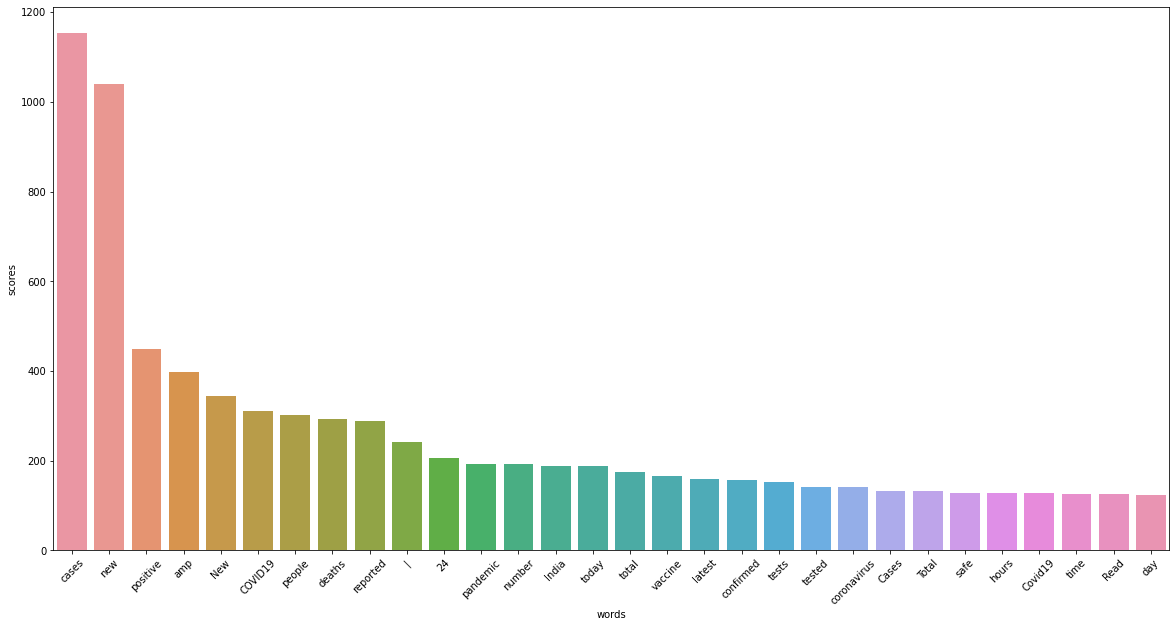

In [56]:
# Plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=pos_df)
plt.xticks(rotation=45)
plt.show()

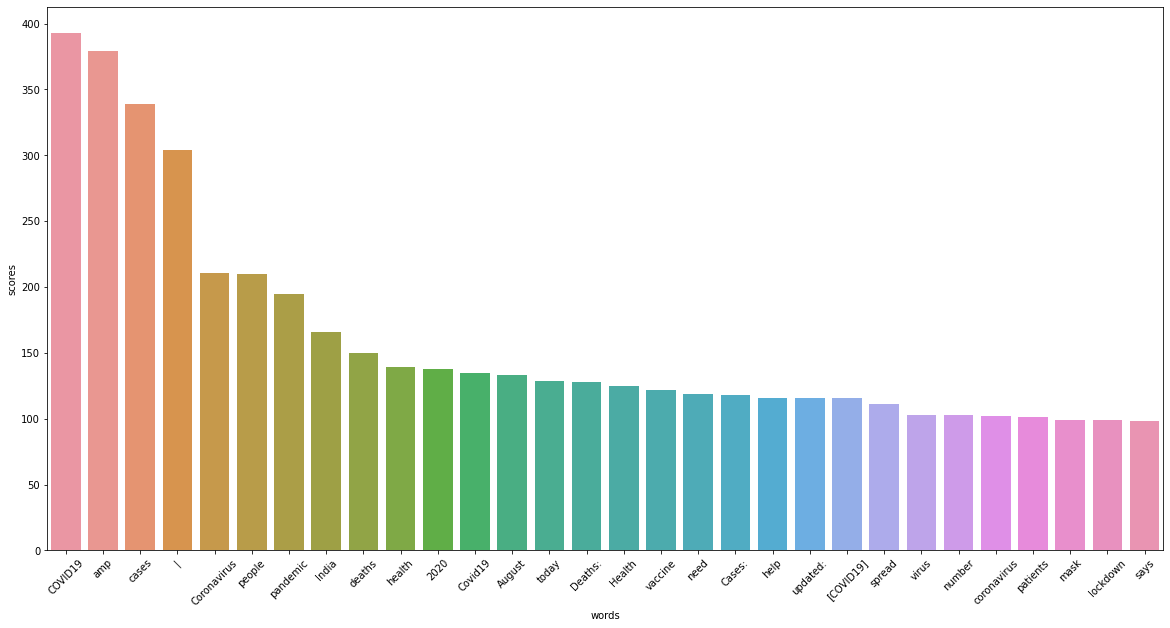

In [46]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neut_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Plot with seaborn
neut_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
plt.figure(figsize=(20,10))
sns.barplot(x='words',y='scores',data=neut_df)
plt.xticks(rotation=45)
plt.show()

### Word Cloud

In [ ]:
from wordcloud import WordCloud

In [ ]:
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:

pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

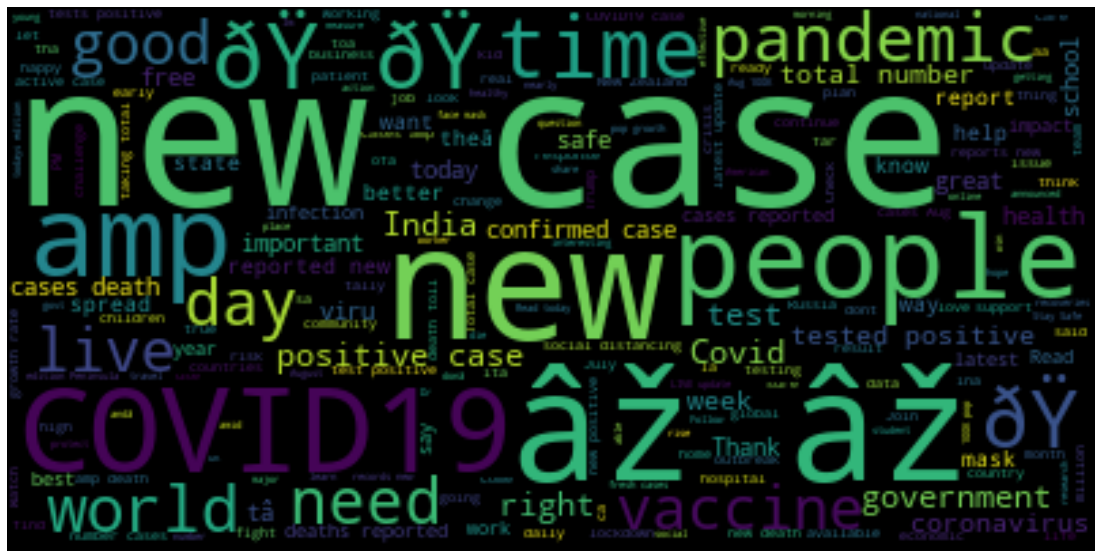

In [58]:

plot_wordcloud(pos_docx)

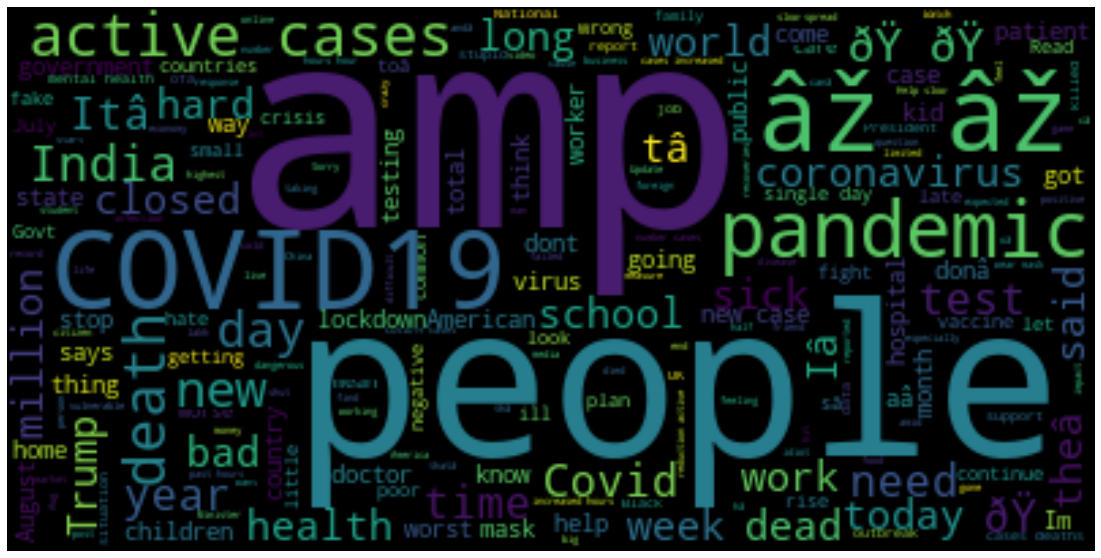

In [57]:
plot_wordcloud(neg_docx)

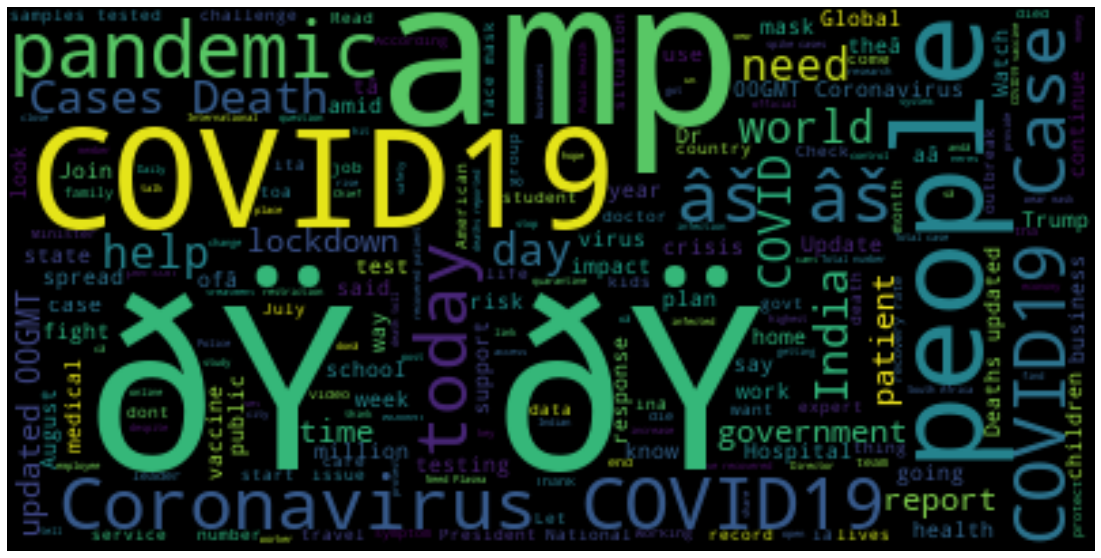

In [53]:
plot_wordcloud(neu_docx)

In [ ]:
tw_add_df = df.groupby(["country", "iso", "alpha3"])['text'].count().reset_index()
tw_add_df.columns = ["country", "iso", "alpha3", "tweets"]

In [55]:
plot_map(tw_add_df, "Tweets per country (where country is specified)")